In [4]:
import os
videos_dir = os.path.join("..", "videos")

In [5]:
from inference import get_model

ROBOFLOW_API_KEY = "H2xvZWwto0OBJMYpuOjZ"
PLAYER_DETECTION_MODEL_ID = "football-players-detection-3zvbc/11"
PLAYER_DETECTION_MODEL = get_model(
    model_id=PLAYER_DETECTION_MODEL_ID,
    api_key=ROBOFLOW_API_KEY
)

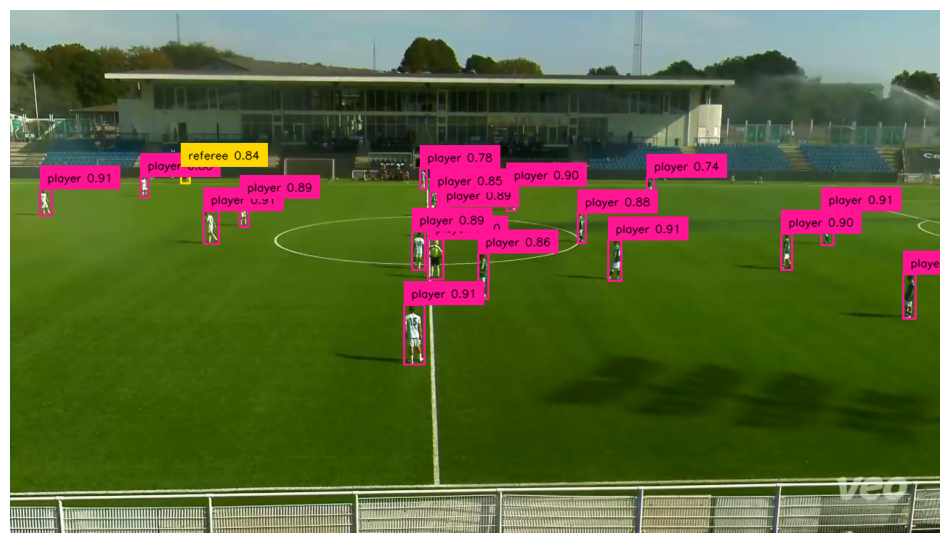

In [18]:
import supervision as sv

TEST_VIDEO_PATH = os.path.join(videos_dir, "g5605392-hd.mp4")

box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex("#000000")
)

frame_generator = sv.get_video_frames_generator(TEST_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)

labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections["class_name"], detections.confidence)
]
annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(annotated_frame, detections)
annotated_frame = label_annotator.annotate(annotated_frame, detections, labels = labels)

sv.plot_image(annotated_frame)

next part
